In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import keras

Using TensorFlow backend.


In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from keras import backend as K

In [3]:
img_width,img_height=150,150
train_data_dir='/content/drive/Shared drives/Unlimited Storage/dataset/training_set'
test_data_dir='/content/drive/Shared drives/Unlimited Storage/dataset/test_set'
epochs=50
nb_train_samples=1000
nb_validation_sample=100
batch_size=20

In [4]:
if K.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 8010 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
classifier = Sequential()
classifier.add(Convolution2D(32 ,kernel_size=(3,3), input_shape=input_shape,activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(64 ,kernel_size=(3,3),activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64,activation="relu"))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(1, activation='sigmoid'))


In [18]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [19]:
model=classifier.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_validation_sample//batch_size
)

Epoch 1/50
50/50 [==============================] - 932s 19s/step - loss: 0.7446 - accuracy: 0.5350 - val_loss: 0.6725 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 948s 19s/step - loss: 0.6956 - accuracy: 0.5200 - val_loss: 0.6843 - val_accuracy: 0.6000
Epoch 3/50
50/50 [==============================] - 958s 19s/step - loss: 0.6831 - accuracy: 0.5710 - val_loss: 0.6669 - val_accuracy: 0.6200
Epoch 4/50
50/50 [==============================] - 929s 19s/step - loss: 0.6791 - accuracy: 0.5690 - val_loss: 0.6505 - val_accuracy: 0.5300
Epoch 5/50
50/50 [==============================] - 972s 19s/step - loss: 0.6825 - accuracy: 0.5810 - val_loss: 0.6727 - val_accuracy: 0.5600
Epoch 6/50
50/50 [==============================] - 967s 19s/step - loss: 0.6596 - accuracy: 0.6010 - val_loss: 0.5597 - val_accuracy: 0.6500
Epoch 7/50
50/50 [==============================] - 940s 19s/step - loss: 0.6666 - accuracy: 0.6200 - val_loss: 0.6979 - val_accuracy: 0.6300
Epoch 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 246 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 206 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/50 [==============================] - 988s 20s/step - loss: 0.6463 - accuracy: 0.6606 - val_loss: 0.7442 - val_accuracy: 0.5600
Epoch 9/50
50/50 [==============================] - 28s 560ms/step - loss: 0.6647 - accuracy: 0.6090 - val_loss: 0.6420 - val_accuracy: 0.6400
Epoch 10/50
50/50 [==============================] - 52s 1s/step - loss: 0.6367 - accuracy: 0.6520 - val_loss: 0.4655 - val_accuracy: 0.6500
Epoch 11/50
50/50 [==============================] - 97s 2s/step - loss: 0.6625 - accuracy: 0.6270 - val_loss: 0.5936 - val_accuracy: 0.6900
Epoch 12/50
50/50 [==============================] - 97s 2s/step - loss: 0.6566 - accuracy: 0.6250 - val_loss: 0.6188 - val_accuracy: 0.5500
Epoch 13/50
50/50 [==============================] - 97s 2s/step - loss: 0.6395 - accuracy: 0.6500 - val_loss: 0.5665 - val_accuracy: 0.7600
Epoch 14/50
50/50 [==============================] - 93s 2s/step - loss: 0.6283 - accuracy: 0.6760 - val_loss: 0.9623 - val_accuracy: 0.6400
Epoch 15/50
50/50 [==

In [20]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5308480   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [22]:
classifier.save("catvsdog.h5")

In [27]:
from keras.models import load_model

In [28]:
model=load_model("catvsdog.h5")

In [32]:
classifier.save_weights("first-attempt.h5")

In [45]:
img_pred=image.load_img('/content/drive/Shared drives/Unlimited Storage/dataset/test_set/cats/cat.4007.jpg',target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)


In [46]:
result=classifier.predict(img_pred)
if(result[0][0]==1):
  prediction="dog"
else:
  prediction="cat"
print(prediction)

cat


In [49]:
img_pred=image.load_img('/content/drive/Shared drives/Unlimited Storage/dataset/test_set/dogs/dog.4007.jpg',target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

In [50]:
result=classifier.predict(img_pred)
if(result[0][0]==1):
  prediction="dog"
else:
  prediction="cat"
print(prediction)

dog


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


cat


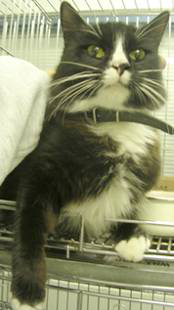

In [48]:
from PIL import Image
img=Image.open('/content/drive/Shared drives/Unlimited Storage/dataset/test_set/cats/cat.4007.jpg')
print(prediction)
display(img)

dog


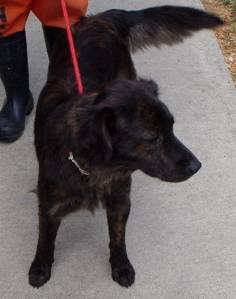

In [51]:
img=Image.open('/content/drive/Shared drives/Unlimited Storage/dataset/test_set/dogs/dog.4007.jpg')

print(prediction)
display(img)